# Model Selection

Objetivo: prever o vencedor de um GP baseado em variáveis de entrada

> Listar Variáveis
- 

In [3]:
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)

In [4]:
df = pd.read_csv("f1_race_features.csv")
df.head()

,season,round,event_name,location,driver_code,driver_name,team_name,final_position,won,podium,points_scored,grid_position,race_experience,weighted_avg_position,weighted_avg_points,recent_form_3races,recent_points_3races,podiums_last_5races,consistency_std_position,finish_rate,avg_grid_position_history,avg_grid_to_race_gain,avg_position_on_circuit,circuit_experience
0,2021,4,Spanish Grand Prix,Barcelona,ALO,Fernando Alonso,Alpine,17.0,0,0,0.0,10.0,3,9.479793,2.905692,12.333333,5.0,0,5.859465,0.666667,12.333333,0.000000,9.479793,0
1,2021,5,Monaco Grand Prix,Monte Carlo,ALO,Fernando Alonso,Alpine,13.0,0,0,0.0,17.0,4,13.760392,1.211737,11.666667,5.0,0,5.322906,0.500000,11.750000,-1.750000,13.760392,0
2,2021,6,Azerbaijan Grand Prix,Baku,ALO,Fernando Alonso,Alpine,6.0,0,0,8.0,8.0,5,13.312638,0.726420,12.666667,4.0,0,4.615192,0.400000,12.800000,-0.600000,13.312638,0
3,2021,7,French Grand Prix,Le Castellet,ALO,Fernando Alonso,Alpine,8.0,0,0,4.0,9.0,6,10.642438,3.410594,12.000000,8.0,0,5.115336,0.500000,12.000000,-0.166667,10.642438,0
4,2021,8,Styrian Grand Prix,Spielberg,ALO,Fernando Alonso,Alpine,9.0,0,0,2.0,8.0,7,9.981199,3.445314,9.000000,12.0,0,4.928054,0.571429,11.571429,0.000000,9.981199,0


In [5]:
df.columns

Index(['season', 'round', 'event_name', 'location', 'driver_code',
       'driver_name', 'team_name', 'final_position', 'won', 'podium',
       'points_scored', 'grid_position', 'race_experience',
       'weighted_avg_position', 'weighted_avg_points', 'recent_form_3races',
       'recent_points_3races', 'podiums_last_5races',
       'consistency_std_position', 'finish_rate', 'avg_grid_position_history',
       'avg_grid_to_race_gain', 'avg_position_on_circuit',
       'circuit_experience'],
      dtype='object')

In [6]:
df.shape

(2094, 24)

In [7]:
df.isnull().sum()

season                       0
round                        0
event_name                   0
location                     0
driver_code                  0
driver_name                  0
team_name                    0
final_position               3
won                          0
podium                       0
points_scored                0
grid_position                3
race_experience              0
weighted_avg_position        0
weighted_avg_points          0
recent_form_3races           0
recent_points_3races         0
podiums_last_5races          0
consistency_std_position     0
finish_rate                  0
avg_grid_position_history    0
avg_grid_to_race_gain        0
avg_position_on_circuit      0
circuit_experience           0
dtype: int64

In [8]:
df[df.isnull().any(axis=1)]

,season,round,event_name,location,driver_code,driver_name,team_name,final_position,won,podium,points_scored,grid_position,race_experience,weighted_avg_position,weighted_avg_points,recent_form_3races,recent_points_3races,podiums_last_5races,consistency_std_position,finish_rate,avg_grid_position_history,avg_grid_to_race_gain,avg_position_on_circuit,circuit_experience
593,2021,22,Abu Dhabi Grand Prix,Yas Island,MAZ,Nikita Mazepin,Haas F1 Team,NaN,0,0,0.0,NaN,21,17.738394,0.00000,17.666667,0.0,0,1.729299,0.095238,18.428571,0.666667,17.738394,0
614,2022,2,Saudi Arabian Grand Prix,Jeddah,MSC,Mick Schumacher,Haas F1 Team,NaN,0,0,0.0,NaN,23,16.444839,0.00000,15.000000,0.0,0,2.423534,0.173913,17.304348,0.652174,20.000000,1
1286,2023,15,Singapore Grand Prix,Marina Bay,STR,Lance Stroll,Aston Martin,NaN,0,0,0.0,NaN,58,11.573549,1.81042,12.000000,2.0,0,3.993681,0.586207,13.017241,1.275862,6.000000,1


In [9]:
df.dropna(inplace=True)

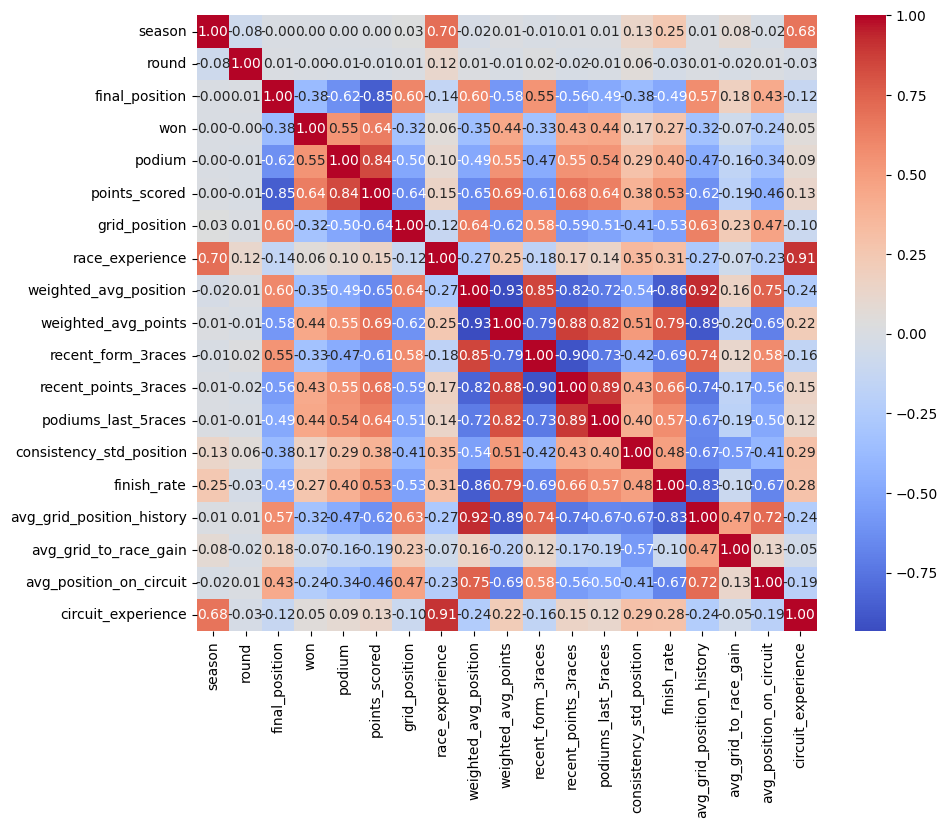

In [10]:
df_num = df.select_dtypes(include='number')
plt.figure(figsize=(10, 8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [ ]:
drop_cols = ['season', 'won', 'podium', 'points_scored', 'final_position']

In [ ]:
train = df_num[df_num['season'] <= 2024]
test  = df_num[df_num['season'] == 2025]

In [ ]:
train.shape

(1703, 19)

In [ ]:
test.shape

(388, 19)

In [ ]:
X_train = train.drop(columns=drop_cols, errors='ignore')
y_train = train['final_position']

X_test  = test.drop(columns=drop_cols, errors='ignore')
y_test  = test['final_position']

In [ ]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
numeric_features = X_train.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ],
    remainder="drop"
)

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001),
    "ElasticNet": ElasticNet(alpha=0.001, l1_ratio=0.5),
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR (RBF)": SVR(kernel="rbf", C=10, gamma="scale")
}


In [ ]:
results = []

for name, model in models.items():
    print(f"Treinando {name}...")
    
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Fit
    pipe.fit(X_train, y_train)
    
    # Predictions
    preds = pipe.predict(X_test)
    
    # Metrics
    mae  = mean_absolute_error(y_test, preds)
    rmse = mean_squared_error(y_test, preds, squared=False)
    r2   = r2_score(y_test, preds)
    
    # Save results
    results.append([name, mae, rmse, r2])

df_results = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2"])
df_results.sort_values(by="RMSE", ascending=True, inplace=True)
df_results


Treinando Linear Regression...
Treinando Ridge...
Treinando Lasso...


c:\Users\thzli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\thzli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\thzli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\thzli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarnin

Treinando ElasticNet...
Treinando Random Forest...


c:\Users\thzli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Treinando Gradient Boosting...


c:\Users\thzli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Treinando SVR (RBF)...


c:\Users\thzli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Model,MAE,RMSE,R2
2,Lasso,3.290645,4.207254,0.464889
3,ElasticNet,3.291623,4.207765,0.464759
1,Ridge,3.292185,4.208292,0.464625
0,Linear Regression,3.291602,4.208329,0.464615
4,Random Forest,3.402225,4.267107,0.449555
5,Gradient Boosting,3.394340,4.284928,0.444948
6,SVR (RBF),3.202751,4.288554,0.444008
